In [2]:
import pandas as pd
from IPython.utils import io
import en_core_sci_lg
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn import metrics
from umap import UMAP
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib inline
tqdm.pandas()
punctuations = string.punctuation
stopwords=list(STOP_WORDS)


C:\Users\mbashir\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
C:\Users\mbashir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = pd.read_csv('./arXiv_metadata.csv')
df[:10]

,Unnamed: 0,id,authors,title,doi,category,abstract
0,485091,2107.14606,"Jan Heisig, Michael Korsmeier, Martin Wolfgang...",Revisiting the AMS-02 antiproton excess: The r...,NaN,"['astro-ph.HE', 'hep-ph']",Cosmic-ray antiprotons are a remarkable diag...
1,458493,2106.04256,"Toru Harada, Yoshiharu Hirabayashi","Production cross sections of $^{3,4}_\Lambda$H...",NaN,['nucl-th'],We investigate theoretically production cros...
2,162105,1910.0171100000002,"Kazuki Takeda, Huilin Xu, Taehyoung Kim, Karol...",Understanding the Heart of the 5G Air Interfac...,NaN,"['cs.NI', 'eess.SP']",New Radio (NR) is a new radio air interface ...
3,313468,2008.09273,"Himan Abdollahpouri, Masoud Mansoury, Robin Bu...","The Connection Between Popularity Bias, Calibr...",NaN,['cs.IR'],Recently there has been a growing interest i...
4,60638,1902.0304899999999,"Leonardo Martini, Zongping Chen, Neeraj Mishra...",Structure-dependent electrical properties of g...,10.1016/j.carbon.2019.01.071,['cond-mat.mes-hall'],Graphene nanoribbons (GNRs) are a novel and ...
5,376499,2012.12148,"Apratim Chakraborty, John B. Etnyre, and Hyunk...",Cabling Legendrian and transverse knots,NaN,"['math.GT', 'math.SG']",In this paper we will show how to classify L...
6,412987,2103.06369,Alex Jones and Derry Tanti Wijaya,Majority Voting with Bidirectional Pre-transla...,NaN,"['cs.CL', 'cs.AI', 'cs.LG']",Obtaining high-quality parallel corpora is o...
7,25456,1807.04765,"Dennis Hansen, Jelle Hartong, Niels A. Obers",Action Principle for Newtonian Gravity,10.1103/PhysRevLett.122.061106,"['hep-th', 'gr-qc']",We derive an action whose equations of motio...
8,341601,2010.08798,Naoki Kubota,Strict comparison for the Lyapunov exponents o...,NaN,['math.PR'],We consider the simple random walk in i.i.d....
9,15975,1802.04127,"Necla Kircali Gursoy, Ibrahim Senturk, Tahsin ...",A New Algorithmic Decision for Categorical Syl...,10.1007/s00500-019-04598-9,"['cs.AI', 'cs.LO']","In this paper, we deal with a calculus syste..."


In [5]:
###########add word count of abstarct and drop duplicated abstracts
df['abstract_word_count']=df['abstract'].apply(lambda w: len(w.strip().split()))
df['abstract'].describe(include='all')

count                                                 10000
unique                                                10000
top         We propose an optical scheme to generate an ...
freq                                                      1
Name: abstract, dtype: object

In [3]:
parse =en_core_sci_lg.load()
def sentence_tokenizer(sentence):
    tokens=parse(sentence)
    tokens=[word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]
    tokens=[word for word in tokens if word not in stopwords and word not in punctuations]
    tokens= ' '.join([word for word in tokens])
    return tokens

In [4]:
df['processed_abstract']=df['abstract'].progress_apply(sentence_tokenizer)

100%|██████████| 10000/10000 [08:56<00:00, 18.63it/s]


In [15]:
text = df['processed_abstract'].values
vectorizer = TfidfVectorizer(max_features=(2 ** 12))
X = vectorizer.fit_transform(text) 
X.shape

(10000, 4096)

In [16]:
pca = PCA(n_components=0.95)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(10000, 2797)

In [42]:
k = 20
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_reduced)
df['kmean_clusters'] = y_pred


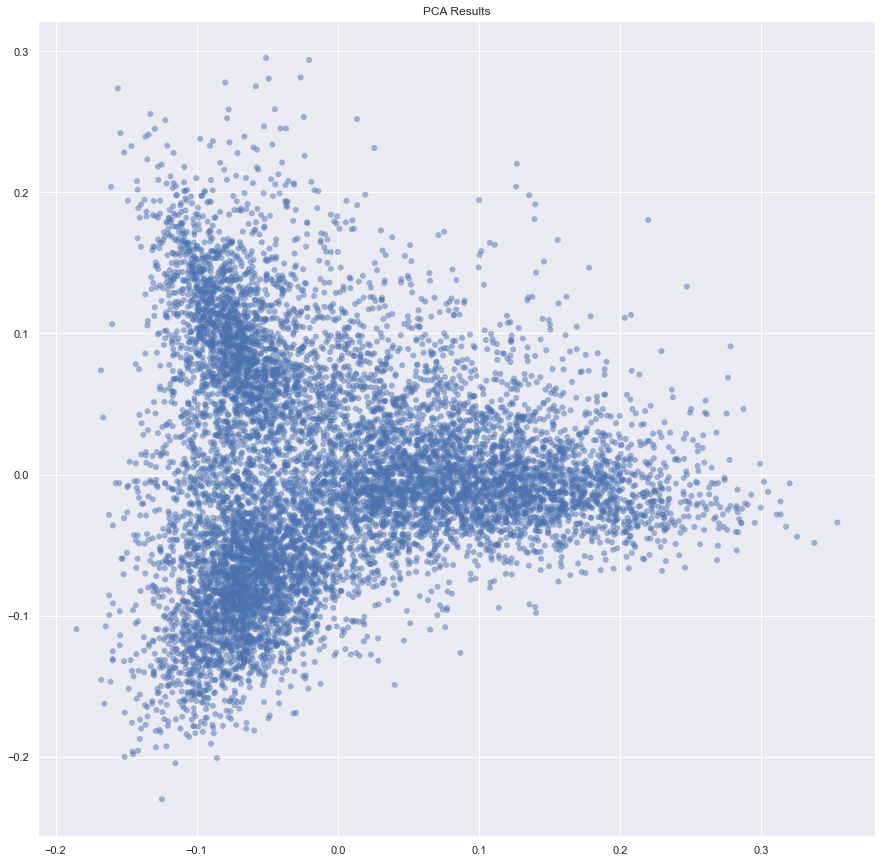

In [46]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='none', alpha=0.5)
plt.title('PCA Results')
plt.show()

In [13]:
tsne = TSNE(verbose=1, perplexity=100)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 27.491s...
[t-SNE] Computed neighbors for 10000 samples in 808.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.314163
[t-SNE] KL divergence after 50 iterations with early exaggeration: 83.260834
[t-SNE] KL divergence after 1000 iterations: 2.587037


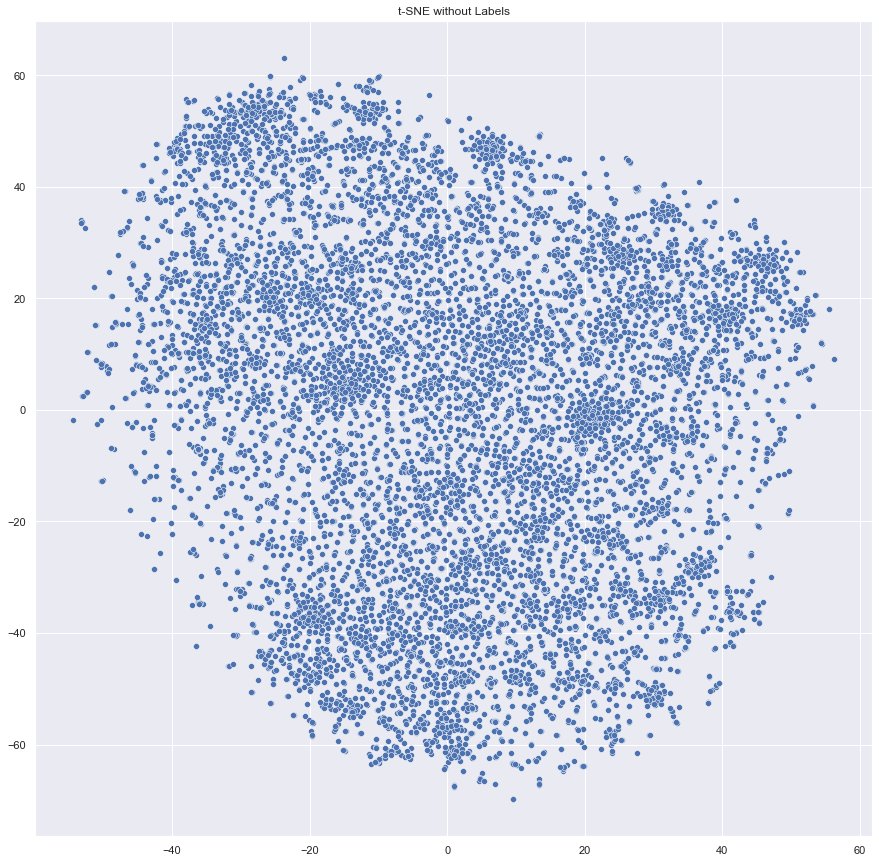

In [18]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1])
plt.title('t-SNE without Labels')
plt.show()

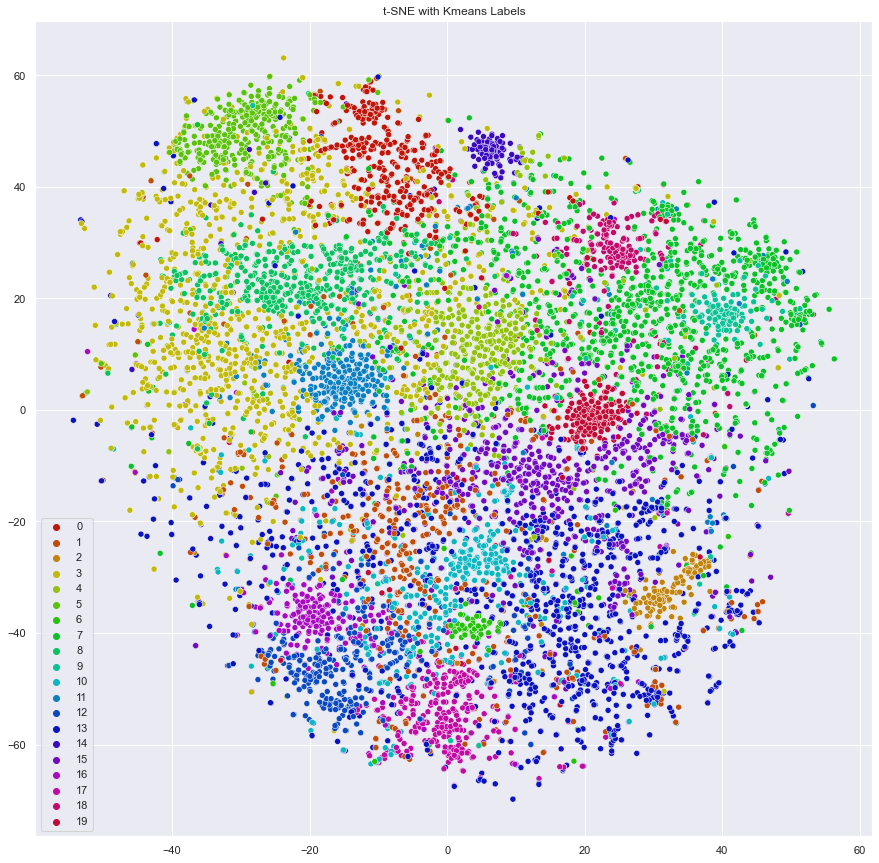

In [14]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.show()